# <center>**Learning Task: Exploratory Data Analysis**</center>
#### 
##### <center>**Group B:** &nbsp;*Mark Angelo Clores &nbsp;|&nbsp; Donn Robert De Lima &nbsp;|&nbsp; Joshua Ean Valera*</center>

---
---
### *Case Study*
This is the season for matchmaking mining. **LoveBug**, a new dating app, has commissioned our team to conduct research and uncover Valentine’s Day patterns and insights that could enhance their app’s content. By analyzing user attributes such as relationship status, romantic expectations, and preferences for Valentine’s Day, we aim to provide valuable data-driven insights. These findings will assist LoveBug in refining its matchmaking algorithms, personalizing user experiences, and crafting targeted marketing strategies to attract and engage potential users.

---
---

## <center>------___I.___ __Import Necessary Modules__------

In [1]:
import numpy as my_n
import pandas as my_p
import matplotlib.pyplot as my_pl
import seaborn as my_sb
from matplotlib import patches
from wordcloud import WordCloud
from PIL import Image

---
---

## <center>------___II.___ __Dataset Overview__------

 ### ___II.a.___ __Importing and Exploring the Dataset__
 The dataset came from the combined results of the Valentines Day survey, which has been organized and cleaned with duplicates removed.

In [2]:
my_love = my_p.read_csv("VDAY_Cleaned_and_Organized.csv")
my_love.shape

(384, 14)

In [3]:
my_love.dtypes

Timestamp                      object
Email Address                  object
Gender                         object
Age                            object
College                        object
Degree_Program                 object
Year_Level                     object
Rel_Status                     object
Prev_Rel                       object
Men_knows                      object
Want_for_Vday                  object
How_Rom_VDay                   object
Imp_Quality                    object
Men_confess_/_Women_answer     object
dtype: object

#### ------- __Dataset Description__ -------.

___Features:___
- _Timestamp_: Represent the calendar date the survey was taken.
- _Email Address_: The email address of the respondents.
- _Gender_ : Gender of the respondent.
- _Age_: Age group of the respondent 
- _College_: The college of the respondent
- _Degree Program_ : The degree program of the respondent
- _Year_Level_ : Year level of the respondent 
- _Rel_Status_ : Relationship status of the respondent
- _Prev_Rel_ : Number of previous relationships
- _Men_knows_ : 
  - "Do men know what female wants?"
- _Want_for_Vday_ : 
  - "Which of the following do you think your significant other would want the most from this Valentine's Day?"
- _How_Rom_VDay_ : 
  - "How romantic do you expect this Valentines to be?"
- _Imp_Quality_ : 
  - "Which is the most important quality you look for when choosing a significant partner?"
- _Men_confess__/__Women_answer_ : 
  - "If male, Do you think Valentine's Day is the best day to confess your feelings to someone?"
  - "If female, Do you think Valentine's Day is the best day to answer your suitor?"   

---


**Lets take a peek at the dataset.**

In [4]:
my_love.head()

,Timestamp,Email Address,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
0,2/6/2025 9:51:57,aidelajusta@my.cspc.edu.ph,Female,19-24,CHS,BSM,Junior,Single,0,No,Flowers,Very Romantic,Shared interests,Yes
1,2/6/2025 13:07:44,llberdul@my.cspc.edu.ph,Female,19-24,CHS,BSN,Junior,Single,1,Yes,Greeting Cards,Not At All Romantic,Intelligence,No
2,2/7/2025 11:04:17,mamasiglat@my.cspc.edu.ph,Female,16-18,CHS,BSM,Freshmen,Single,1,No,Romantic Dinners/Getaways,Not At All Romantic,Intelligence,No
3,2/7/2025 17:10:13,xiparone@my.cspc.edu.ph,Female,19-24,CHS,BSN,Junior,In a relationship,2,Yes,Greeting Cards,Moderately Romantic,Shared interests,Yes
4,2/7/2025 17:12:34,joclavillas@my.cspc.edu.ph,Female,19-24,CHS,BSN,Junior,Single,2,No,K-pop Merchandise,Moderately Romantic,Sensitivity,Maybe


In [5]:
my_love.tail()

,Timestamp,Email Address,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
379,2/14/2025 21:20:46,jobaeno@my.cspc.edu.ph,Female,19-24,CTDE,BTVTEd,Junior,Single,2,They will never know!,To hear “I Love You”,Very Romantic,Humor/Fun,Maybe
380,2/14/2025 23:04:31,givillamayor@my.cspc.edu.ph,Male,19-24,CTDE,BTVTEd,Sophomore,Single,1,Yes,To hear “I Love You”,Moderately Romantic,Intelligence,Maybe
381,2/15/2025 10:44:47,erocayo@my.cspc.edu.ph,Male,19-24,CCS,BSIS,Sophomore,It’s complicated,1,They will never know!,Romantic Dinners/Getaways,Very Romantic,Humor/Fun,Maybe
382,2/15/2025 10:47:03,joespedillon@my.cspc.edu.ph,Male,19-24,CCS,BSIS,Sophomore,Single,1,Yes,Greeting Cards,Moderately Romantic,Humor/Fun,Maybe
383,2/15/2025 10:52:50,marolino@my.cspc.edu.ph,Male,19-24,CCS,BSIS,Junior,Single,0,Yes,NaN,Very Romantic,Intelligence,Yes



**Let's summarize the dataset using *describe()*.**

In [6]:
my_love.describe()

,Timestamp,Email Address,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
count,384,384,384,384,384,383,381,384,384,384,378,384,384,384
unique,384,384,2,3,6,23,4,7,12,4,71,6,40,3
top,2/14/2025 12:57:54,krpadua@my.cspc.edu.ph,Female,19-24,CCS,BSIT,Junior,Single,0,Yes,Flowers,Moderately Romantic,Sincerity,Maybe
freq,1,1,236,333,156,51,127,210,136,183,137,156,106,192


From the summary above, we can conclude the following:
- The *count* metric indicates the presence of missing data in some columns.
- The *top* metric provides insight into the most frequently occurring responses. For example, the majority of respondents are female, juniors, and single. However, this does not fully represent the overall survey results, as such further analysis is needed for a more comprehensive understanding.
---


**Since we have missing data, let's drop them from the dataset.**

In [7]:
my_love.isnull().sum()

Timestamp                      0
Email Address                  0
Gender                         0
Age                            0
College                        0
Degree_Program                 1
Year_Level                     3
Rel_Status                     0
Prev_Rel                       0
Men_knows                      0
Want_for_Vday                  6
How_Rom_VDay                   0
Imp_Quality                    0
Men_confess_/_Women_answer     0
dtype: int64

In [8]:
my_love = my_love.dropna()

In [9]:
my_love.shape

(374, 14)

After data cleaning, the dataset is now left with 374 respondents. Let's proceed to data visualizations.

---
---
## <center>------___III.___ __Dataset Overview Visualizations__------

Lets drop the features *Timestamp* and *Email Address* since they are irrelevant to the succeeding visualizations.

In [10]:
my_love.drop(["Timestamp", "Email Address"],axis=1,inplace=True)
my_love.head()

,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
0,Female,19-24,CHS,BSM,Junior,Single,0,No,Flowers,Very Romantic,Shared interests,Yes
1,Female,19-24,CHS,BSN,Junior,Single,1,Yes,Greeting Cards,Not At All Romantic,Intelligence,No
2,Female,16-18,CHS,BSM,Freshmen,Single,1,No,Romantic Dinners/Getaways,Not At All Romantic,Intelligence,No
3,Female,19-24,CHS,BSN,Junior,In a relationship,2,Yes,Greeting Cards,Moderately Romantic,Shared interests,Yes
4,Female,19-24,CHS,BSN,Junior,Single,2,No,K-pop Merchandise,Moderately Romantic,Sensitivity,Maybe



 ### ___II.a.___ __Gender Distribution of the Respondents__

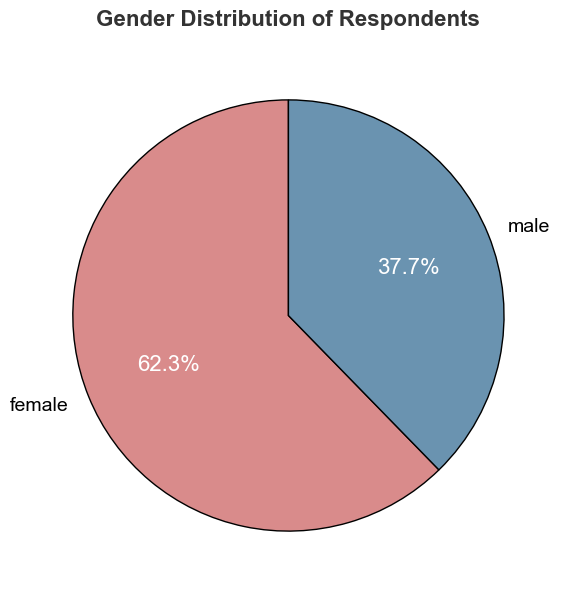

In [22]:
gender_counts = my_love["Gender"].value_counts()

gender_colors = ["#D98B8B", "#6A93B0"]  

my_pl.figure(figsize=(7, 7))

wedges, texts, autotexts = my_pl.pie(
    gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
    colors=gender_colors, startangle=90, wedgeprops={'edgecolor': 'black'}, 
    textprops={'color': 'white', 'fontsize': 14} 
)

for text in texts:  
    text.set_color("black")    
    text.set_fontsize(14)   

for autotext in autotexts:  
    autotext.set_color("white")   
    autotext.set_fontsize(16)  

my_pl.title("Gender Distribution of Respondents", fontsize=16, fontweight="bold", pad=15, color="#333")

my_pl.show()


Based on the pie chart, majority of the respondents are female with a ratio of 61.5% to 38.5%

--- 

<Figure size 1200x800 with 0 Axes>

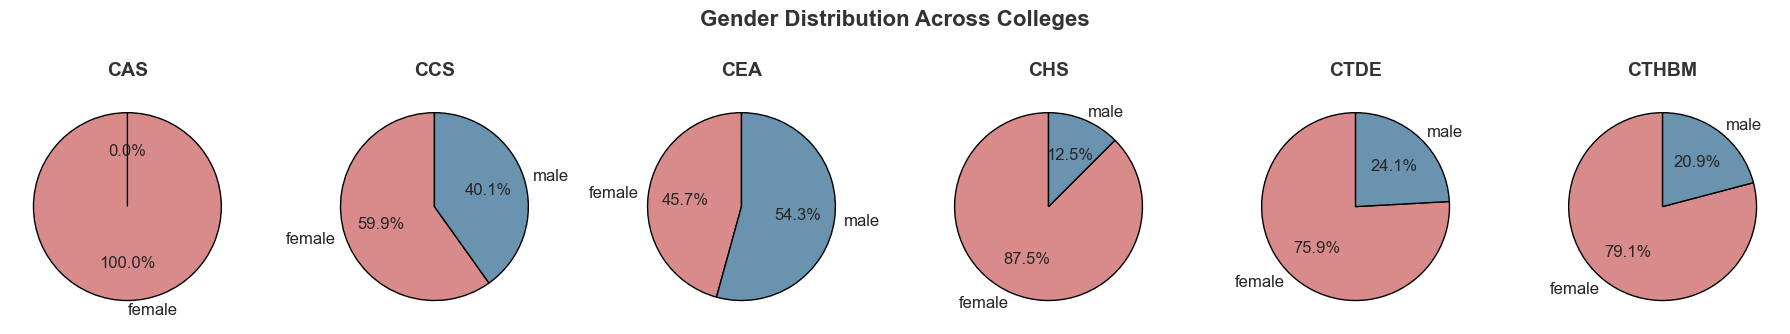

In [23]:
my_pl.figure(figsize=(12, 8))

college_gender_counts = my_love.groupby("College ")["Gender"].value_counts().unstack()

fig, axes = my_pl.subplots(nrows=1, ncols=len(college_gender_counts), figsize=(18, 6))

for ax, (college, data) in zip(axes, college_gender_counts.iterrows()):
    data.plot(kind="pie", ax=ax, autopct="%1.1f%%", colors=gender_colors, startangle=90, 
              wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
    ax.set_title(college, fontsize=14, fontweight="bold", pad=10, color="#333")
    ax.set_ylabel("")  

my_pl.suptitle("Gender Distribution Across Colleges", fontsize=16, fontweight="bold", color="#333", y=0.8 )

my_pl.tight_layout()
my_pl.show()

Here we can see the gender distribution per colleges presented thgrough pie graphs. Based on the graph above:
- The Respondents from College of Arts and Sciences are female.
- Female respondents are the majority in CCS, CHS, CTDE, and CTHBM.
- On the other hand, majority of the respondents from the College of Engineering and Architecture were male.

---

 ### ___II.b.___ __Degree Program Distribution of the Respondents__

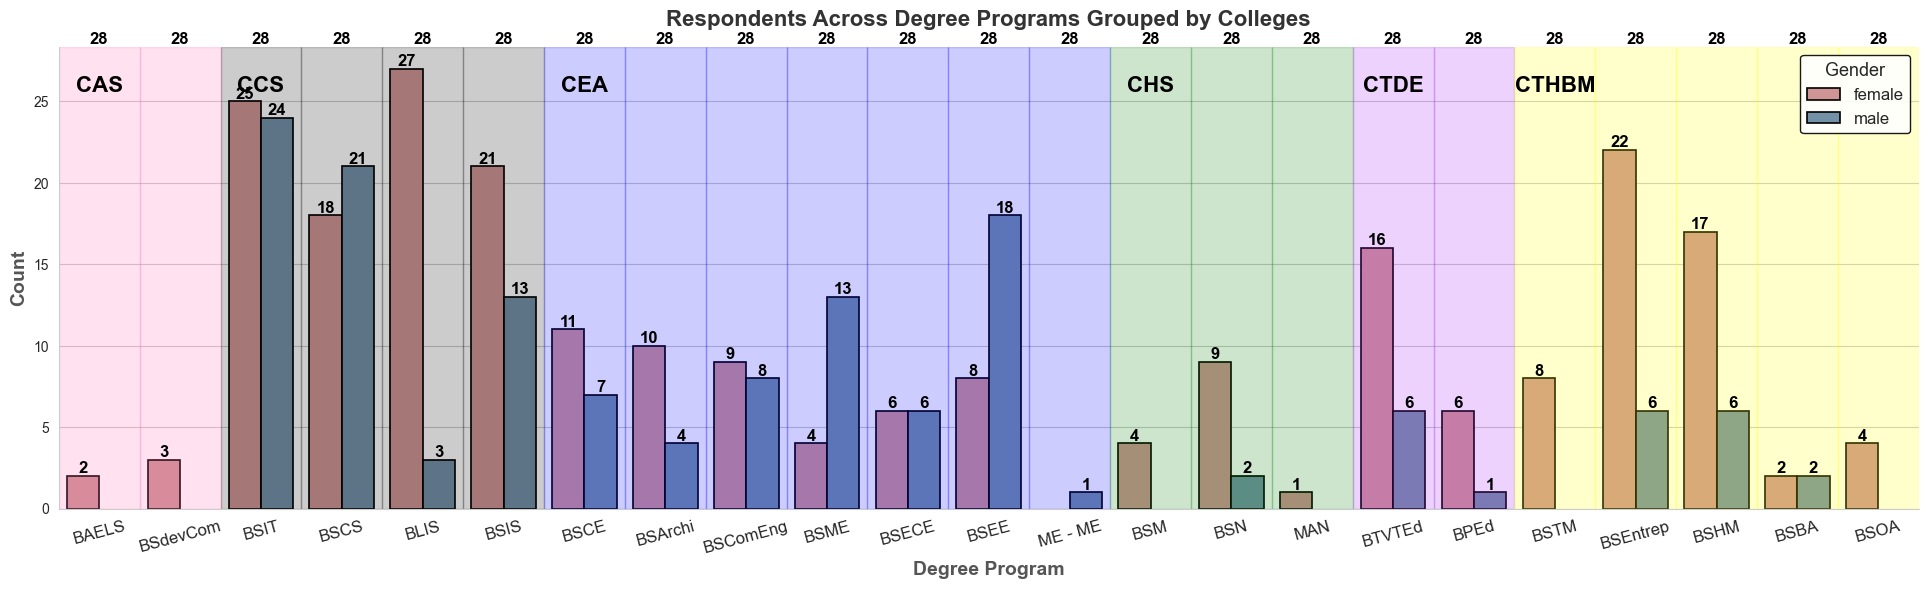

In [24]:
my_pl.figure(figsize=(24, 6))

my_love['College_Group'] = my_love['Degree_Program'].map(
    lambda x: my_love[my_love['Degree_Program'] == x]['College '].iloc[0]
)

program_order = my_love.groupby('College_Group')['Degree_Program'].apply(lambda x: x.unique()).explode().values

ax = my_sb.countplot(data=my_love, x="Degree_Program", hue="Gender", order=program_order,
                      palette=gender_colors, edgecolor="black", linewidth=1.2)

college_colors = {
    'CCS': '#000000',  
    'CEA': '#0000FF',  
    'CAS': '#FF69B4',  
    'CHS': '#008000',  
    'CTDE': '#A020F0', 
    'CTHBM': '#FFFF00' 
}

college_labels = {}
for i, program in enumerate(program_order):
    college = my_love[my_love['Degree_Program'] == program]['College '].iloc[0]
    color = college_colors[college]
    ax.add_patch(patches.Rectangle((i - 0.5, 0), 1, ax.get_ylim()[1], color=color, alpha=0.2))

    if college not in college_labels:
        college_labels[college] = i 

for college, idx in college_labels.items():
    ax.text(idx, ax.get_ylim()[1] + -3, college, ha='center', va='bottom', fontsize=16, fontweight="bold", color="black")

for p in ax.patches:
    count = int(p.get_height())

    category = p.get_x() + p.get_width() / 2  
    category_label = ax.get_xticklabels()[int(category)].get_text()

    if count > 0:
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

my_pl.title("Respondents Across Degree Programs Grouped by Colleges", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Degree Program", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

my_pl.xticks(rotation=15, fontsize=12)

legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

my_sb.despine()

my_pl.show()


Many programs particularly in CHS, CTDE, CTHBM show a higher proportion of females. Traditional Engineering fields such as BSME, BSEE, BSCompEng as well as BSCS tend to show higher number of males.

---

 ### ___II.c.___ __Age Distribution of the Respondents__
 

In [14]:
my_love['Gender']=my_love['Gender'].str.lower()

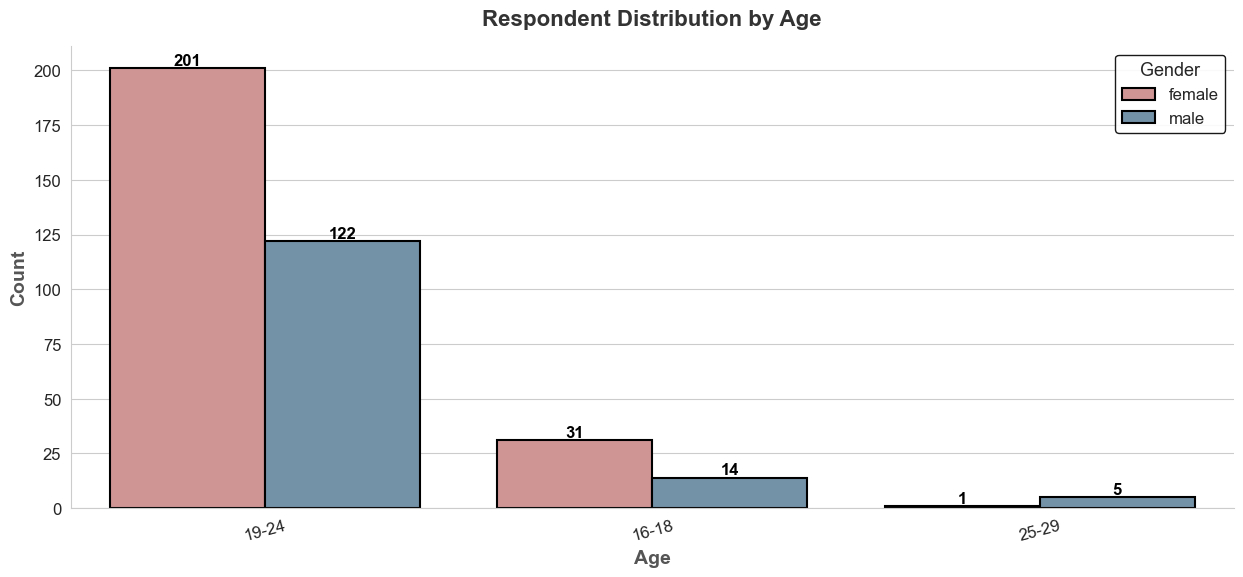

In [15]:
# Set Seaborn style for a polished look
my_sb.set_style("whitegrid")

# Set up the figure
my_pl.figure(figsize=(15, 6))

# Create a bar plot to show age distribution by gender
ax = my_sb.countplot(x="Age", hue="Gender", data=my_love, palette=gender_colors, edgecolor="black", linewidth=1.5)

# Annotate each bar with the exact count
for p in ax.patches:
    count = int(p.get_height())  # Get count value

    # Get category label (age group)
    category = p.get_x() + p.get_width() / 2  
    category_label = ax.get_xticklabels()[int(category)].get_text()  # Extract text label

    # Skip annotating "0" for "19-24"
    if count > 0 or category_label != "19-24":
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")


# Improve titles and labels
my_pl.title("Respondent Distribution by Age", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Age", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)  # Slight transparency

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Remove top and right borders for a clean design
my_sb.despine()

# Show the plot
my_pl.show()


Also, Age is a factor we want to look out for. In the graph presented above, we can see that out of 374 respondents, 204 female and 129 male respondents were at the age of 19 - 24. This means that majority of the respondents were teens and young adults.

---


 ### ___II.d.___ __Year Level of the Respondents__

C:\Users\Joshua Ean\AppData\Local\Temp\ipykernel_105616\2103894492.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = my_love.groupby(["Year_Level", "Gender"]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

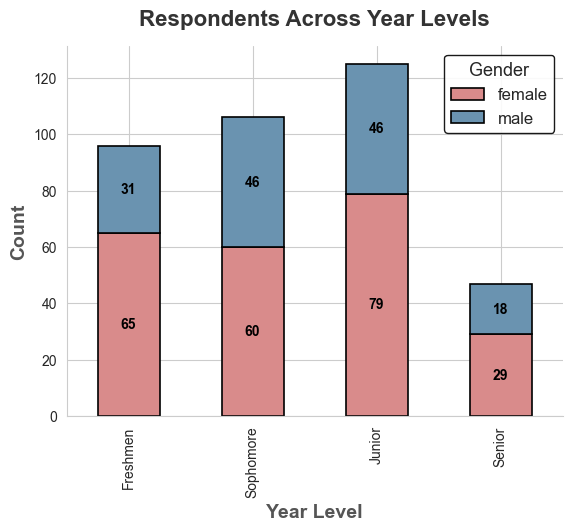

In [16]:
# Ensure "Year_Level" is treated as a categorical variable with a fixed order
year_order = ["Freshmen", "Sophomore", "Junior", "Senior"]
my_love["Year_Level"] = my_p.Categorical(my_love["Year_Level"], categories=year_order, ordered=True)

# Aggregate data for stacked bar plot
pivot_data = my_love.groupby(["Year_Level", "Gender"]).size().unstack(fill_value=0)


# Set figure size
my_pl.figure(figsize=(12, 8))

# Plot stacked bar chart
ax = pivot_data.plot(kind="bar", stacked=True, color=gender_colors, edgecolor="black", linewidth=1.2)

# Add count labels inside the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=10, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Respondents Across Year Levels", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Year Level", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()

The highest number of survey respondents came from the Junior year, followed by Sophomores and Freshmen. Significantly fewer Seniors have participated in the survvey. This is due to their decreased availability as they are busy working on their finals capstone/thesis.

---

 ### ___II.e.___ __Relationship Status of the Respondents__

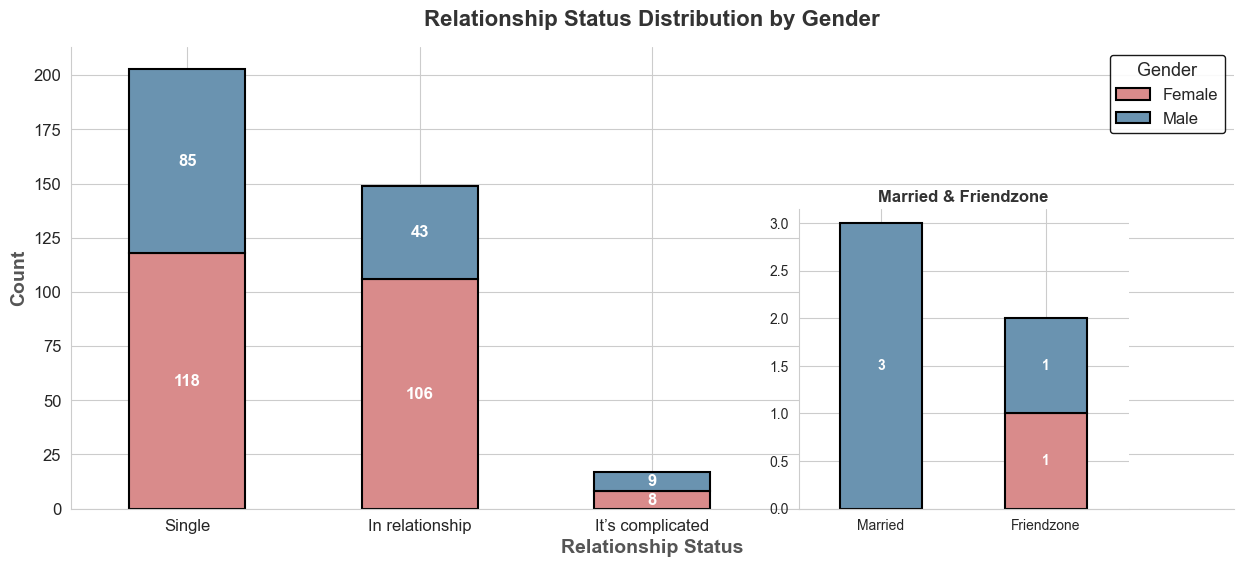

In [17]:
# Standardizing Relationship Status labels
my_love["Rel_Status"] = my_love["Rel_Status"].replace({
    "In a relationship": "In relationship",
    "It's complicated": "It’s complicated"
})

# Count occurrences of each relationship status by gender
rel_counts = my_love.groupby(["Rel_Status", "Gender"]).size().unstack(fill_value=0)

# 🔹 Separate the two sets of categories
main_categories = ["Single", "In relationship", "It’s complicated"]
special_categories = ["Married", "Friendzone"]

main_counts = rel_counts.loc[rel_counts.index.isin(main_categories)]
special_counts = rel_counts.loc[rel_counts.index.isin(special_categories)]

# 🔹 Sort both datasets by total count (highest to lowest)
main_counts = main_counts.loc[main_counts.sum(axis=1).sort_values(ascending=False).index]
special_counts = special_counts.loc[special_counts.sum(axis=1).sort_values(ascending=False).index]

# Set color scheme (blue for female, pink for male)
gender_colors = {"male": "#6A93B0", "female": "#D98B8B"}

# 🔹 Create main figure and axes (Balanced width)
fig, ax_main = my_pl.subplots(figsize=(15, 6))  # Slightly reduced width

# 🔹 Plot Main Graph (Single, In Relationship, It’s Complicated)
main_counts.plot(kind="bar", stacked=True, width=0.5, ax=ax_main,
                 color=[gender_colors[col] for col in main_counts.columns], 
                 edgecolor="black", linewidth=1.5)

# Annotate bars for the main graph
for container in ax_main.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax_main.annotate(f'{int(height)}', 
                             (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                             ha='center', va='center', fontsize=12, fontweight="bold", color="white")

# Improve main graph labels and title
ax_main.set_title("Relationship Status Distribution by Gender", fontsize=16, fontweight="bold", pad=15, color="#333")
ax_main.set_xlabel("Relationship Status", fontsize=14, fontweight="bold", color="#555")
ax_main.set_ylabel("Count", fontsize=14, fontweight="bold", color="#555")
ax_main.set_xticklabels(main_counts.index, rotation=0, fontsize=12)
ax_main.tick_params(axis='y', labelsize=12)

# Adjust main graph legend **(Moved to Upper Right)**
legend = ax_main.legend(title="Gender", labels=["Female", "Male"], fontsize=12, title_fontsize=13, 
                         frameon=True, facecolor="white", edgecolor="black", loc="upper right")
legend.get_frame().set_alpha(0.9)

# Remove extra borders
my_sb.despine(ax=ax_main)

# 🔹 Create **Blank Space** for the Second Graph
ax_main.set_xlim(-0.5, len(main_counts.index) + 1.5)  # Creates smaller blank space

# 🔹 Create **Graph 2 (Married & Friendzone)**
ax_special = fig.add_axes([0.61, 0.11, 0.22, 0.5])  # Lowered from `0.2` to `0.15`

special_counts.plot(kind="bar", stacked=True, width=0.5, ax=ax_special,
                    color=[gender_colors[col] for col in special_counts.columns], 
                    edgecolor="black", linewidth=1.5)

# Annotate bars for the special graph
for container in ax_special.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax_special.annotate(f'{int(height)}', 
                              (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                              ha='center', va='center', fontsize=10, fontweight="bold", color="white")

# Improve labels for special graph
ax_special.set_title("Married & Friendzone", fontsize=12, fontweight="bold", pad=5, color="#333")
ax_special.set_xticklabels(special_counts.index, rotation=0, fontsize=10)
ax_special.tick_params(axis='y', labelsize=10)

# 🔹 **REMOVE X-AXIS LABEL from Graph 2**
ax_special.set_xlabel("")  # Removes 'Rel_Status' label

# 🔹 **REMOVE LEGEND from Graph 2**
ax_special.get_legend().remove()  # This line removes the legend

# Remove extra borders in special graph
my_sb.despine(ax=ax_special)

# Show the full figure
my_pl.show()

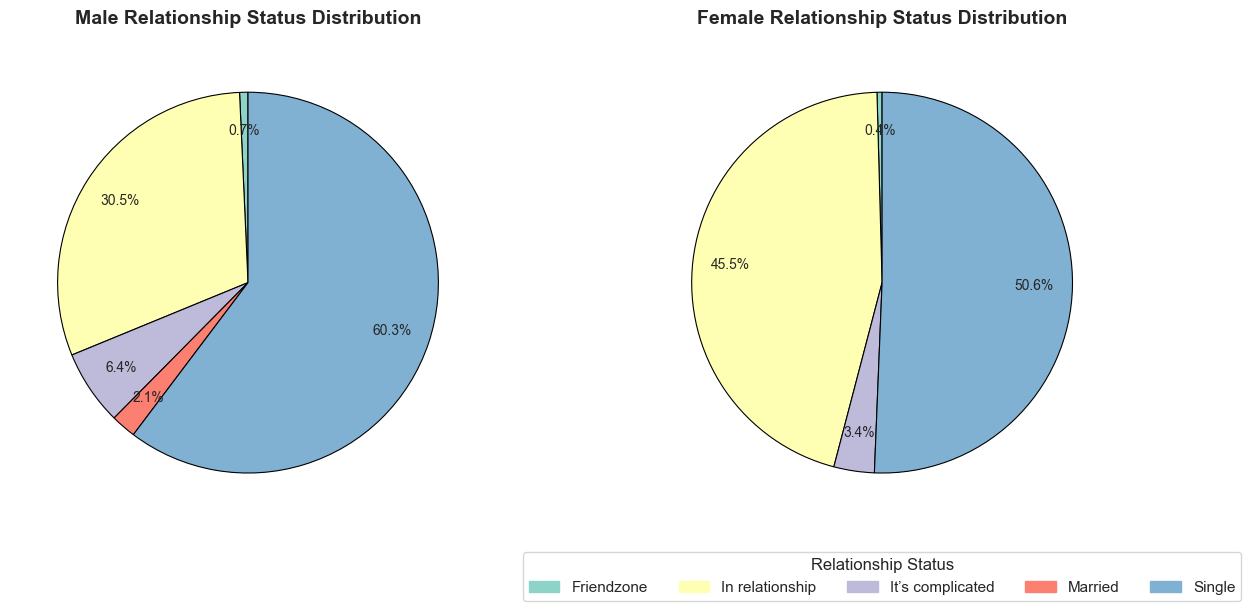

In [18]:

female_data = ['Single'] * 118 + ['In relationship'] * 106 + ["It's complicated"] * 8 + ['Friendzone'] * 1
male_data = ['Single'] * 85 + ['In relationship'] * 43 + ["It's complicated"] * 9 + ['Married'] * 3 + ['Friendzone'] * 1
genders = ['female'] * len(female_data) + ['male'] * len(male_data)
statuses = female_data + male_data


# 1. Define Palette Consistently: Use all unique statuses found in the data
all_statuses = sorted(my_love["Rel_Status"].unique()) # Sort for consistent order
status_palette = my_sb.color_palette("Set3", n_colors=len(all_statuses))
# Create a mapping from status to color for reliable color assignment
status_color_map = dict(zip(all_statuses, status_palette))

# 2. Set Figure Size
my_pl.figure(figsize=(15, 7)) # Slightly wider figure

# --- Male Pie Chart ---
ax1 = my_pl.subplot(1, 2, 1)  # First subplot for males
male_status_counts = my_love[my_love["Gender"] == "male"]["Rel_Status"].value_counts()
# Ensure consistent ordering and colors using the map
male_status_counts = male_status_counts.reindex(all_statuses).dropna() # Use sorted statuses
male_colors = [status_color_map[status] for status in male_status_counts.index]

# 3. Plot Male Pie Chart - Simplify Labels
wedges_m, texts_m, autotexts_m = ax1.pie(
    male_status_counts,
    autopct='%1.1f%%',  # Keep percentages inside
    colors=male_colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.8}, # Thinner edge
    pctdistance=0.80,  # Adjust percentage distance slightly
    # labels=None # Remove direct labels on slices - use legend instead
    textprops={'fontsize': 10} # Smaller font for percentages
)

# 4. Title for Male Chart
ax1.set_title("Male Relationship Status Distribution", fontsize=14, fontweight="bold", pad=15)

# --- Female Pie Chart ---
ax2 = my_pl.subplot(1, 2, 2)  # Second subplot for females
female_status_counts = my_love[my_love["Gender"] == "female"]["Rel_Status"].value_counts()
# Ensure consistent ordering and colors using the map
female_status_counts = female_status_counts.reindex(all_statuses).dropna() # Use sorted statuses
female_colors = [status_color_map[status] for status in female_status_counts.index]

# 5. Plot Female Pie Chart - Simplify Labels
wedges_f, texts_f, autotexts_f = ax2.pie(
    female_status_counts,
    autopct='%1.1f%%', # Keep percentages inside
    colors=female_colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.8}, # Thinner edge
    pctdistance=0.80, # Adjust percentage distance slightly
    # labels=None # Remove direct labels on slices - use legend instead
    textprops={'fontsize': 10} # Smaller font for percentages
)

# 6. Title for Female Chart
ax2.set_title("Female Relationship Status Distribution", fontsize=14, fontweight="bold", pad=15)

# 7. Add a Single, Clear Legend (instead of labels on slices)
# Use the consistent handles and labels derived from all_statuses and the color map
handles = [my_pl.Rectangle((0,0),1,1, color=status_color_map[status]) for status in all_statuses if status in male_status_counts.index or status in female_status_counts.index] # Only include statuses present in data
labels = [status for status in all_statuses if status in male_status_counts.index or status in female_status_counts.index]
# Position legend centrally below the plots
my_pl.legend(handles, labels, title="Relationship Status", loc='upper center',
             bbox_to_anchor=(0.5, -0.05), # Position below charts
             ncol=len(labels), # Arrange horizontally
             fontsize=11, title_fontsize=12)

# 8. Adjust Layout
my_pl.subplots_adjust(bottom=0.2) # Add space at the bottom for the legend
# my_pl.tight_layout(rect=[0, 0.1, 1, 1]) # Use subplots_adjust instead if legend is below


# Show the plot
my_pl.show()

Among the predominantly young adult respondents of the Valentine's survey in CSPC, being "Single" or "In relationship" were the most common statuses. While more females participated overall, a higher proportion of the male respondents identified as single (85/141 ≈ 60%) compared to female respondents (118/233 ≈ 51%). Conversely, a higher proportion of female respondents identified as being in a relationship (106/233 ≈ 46%) compared to male respondents (43/141 ≈ 31%).

---

 ### ___II.f.___ __Previous Relationships of the Respondents__

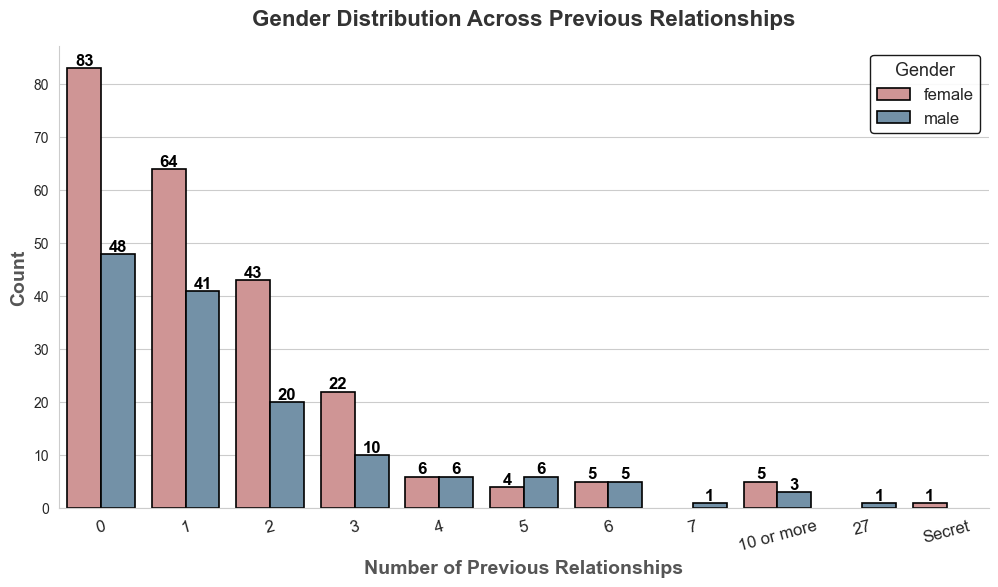

In [19]:
# Standardizing "Prev_Rel" labels
my_love["Prev_Rel"] = my_love["Prev_Rel"].replace({
    "10 and more": "10 or more",  # Unifying label
})

# Define the correct ascending order
prev_rel_order = sorted(my_love["Prev_Rel"].unique(), key=lambda x: int(x.split()[0]) if x[0].isdigit() else 999)

# Set figure size
my_pl.figure(figsize=(12, 6))

# Create a count plot for gender distribution across Previous Relationships
ax = my_sb.countplot(data=my_love, x="Prev_Rel", hue="Gender", 
                      order=prev_rel_order, palette=gender_colors, edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution Across Previous Relationships", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Number of Previous Relationships", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(fontsize=12, rotation=15)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


The chart shows that among the student respondents to the Valentine's survey, a huge portion of them reported having none to few (0, 1, or 2) previous relationships. Because more females participated overall, leading to higher absolute counts in these low categories, the proportion of reporting zero previous relationships is stil similar between genders. On the other hand, females are more likely than males report having exactly 2 or 3 previous relationships. And as the number of previous relationships increases, the number of respondents also dropped significantly on both genders. Interestingly, there are two outliers. One respondent having 27 previous relationships while the other wrote 'Secret'.

---

 ### ___II.g.___ __Do Men Know What Women Want?__

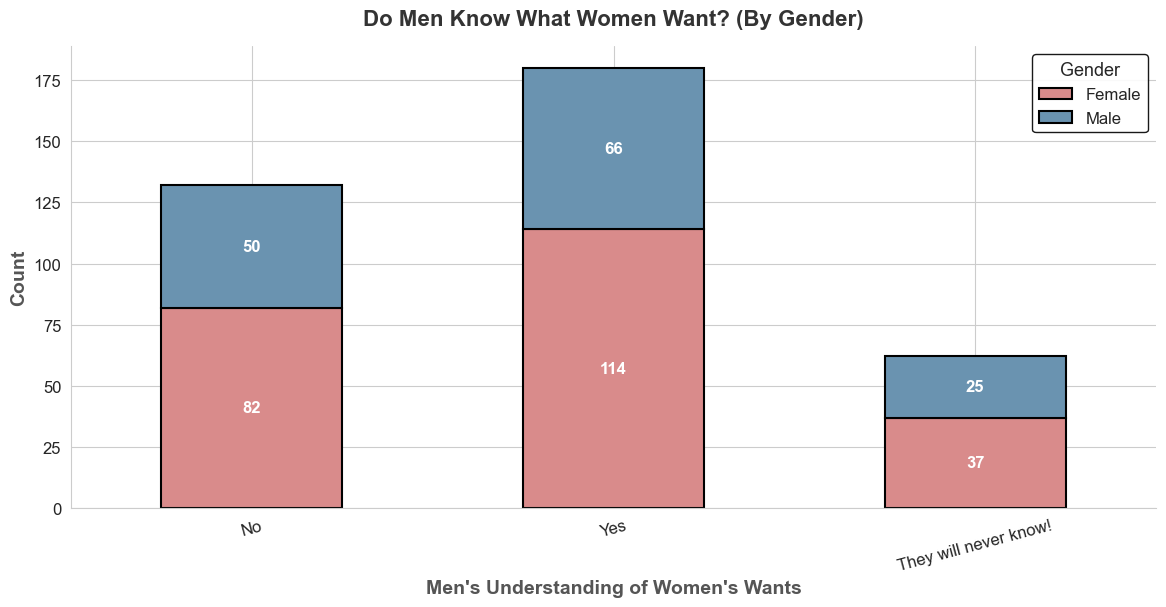

In [20]:
# Standardizing "Men_knows" labels
my_love["Men_knows "] = my_love["Men_knows "].replace({
    "Will never know": "They will never know!"
})

# Count occurrences of each category by gender
men_knows_counts = my_love.groupby(["Men_knows ", "Gender"]).size().unstack(fill_value=0)

# Keep original order (no sorting)
men_knows_counts = men_knows_counts.reindex(my_love["Men_knows "].unique())


# Plot stacked bar chart
ax = men_knows_counts.plot(kind="bar", stacked=True, figsize=(14, 6), 
                           color=[gender_colors[col] for col in men_knows_counts.columns], 
                           edgecolor="black", linewidth=1.5)

# Annotate bars with count values
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                        ha='center', va='center', fontsize=12, fontweight="bold", color="white")

# Improve titles and labels
my_pl.title("Do Men Know What Women Want? (By Gender)", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Men's Understanding of Women's Wants", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Adjust legend
legend = my_pl.legend(title="Gender", labels=["Female", "Male"], fontsize=12, title_fontsize=13, 
                      frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Clean up extra borders
my_sb.despine()

# Show the plot
my_pl.show()

- **Gender Perspective (Proportional View)**: Since more females participated in the survey overall (approx. 233 F vs 141 M), looking at proportions within each gender gives a clearer picture of their respective opinions:
    - Answering "Yes": Roughly similar proportions of females (114/233 ≈ 48.9%) and males (66/141 ≈ 46.8%) gave this positive response.
    - Answering "No": Almost identical proportions of females (82/233 ≈ 35.2%) and males (50/141 ≈ 35.5%) gave this negative response.
    - Answering "They will never know!": A slightly higher proportion of males (25/141 ≈ 17.7%) chose this option compared to females (37/233 ≈ 15.9%).

The chart above reveals that respondents were divided on their opinions whether men know what women want. Despite "Yes" being the most popular answer, it is only a bit higher than the respondents who expressed doubt and answered "No" or "They will never know!". Interestingly, both male and female repondents showed identical answers, indicating that there is no strong gender divide on this particular question. 

---

 ### ___II.h.___ __Age Distribution of the Respondents__

In [21]:
mask_image = my_n.array(Image.open('heart.png'))

# Combine all responses into a single string
text = " ".join(my_love["Want_for_Vday"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=600, background_color="white", mask=mask_image, collocations=False, prefer_horizontal=1,
                      colormap="hsv", min_font_size= 2, scale=3, margin=0,
                      max_words=300, font_path=None).generate(text)

# Plot the word cloud
my_pl.figure(figsize=(12, 6))
my_pl.imshow(wordcloud, interpolation="bilinear")
my_pl.axis("off")  # Hide axes
my_pl.title("Word Cloud: What People Want for Valentine's Day", fontsize=16, fontweight="bold")
my_pl.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Joshua Ean\\Downloads\\heart.png'

The word cloud above depicts a picture of the Valentine's Day wishes among the student respondents of CSPC. The most popular wishes blended traditional romantic gifts (Flowers, Chocolate, Cards), desired experiences (Dinners, Getaways, Romantic time), and practical considerations (Money). Emotional connection and affection (Love, Time, Letters, Attention, Kiss, Hugs, cuddle) were also very important themes.

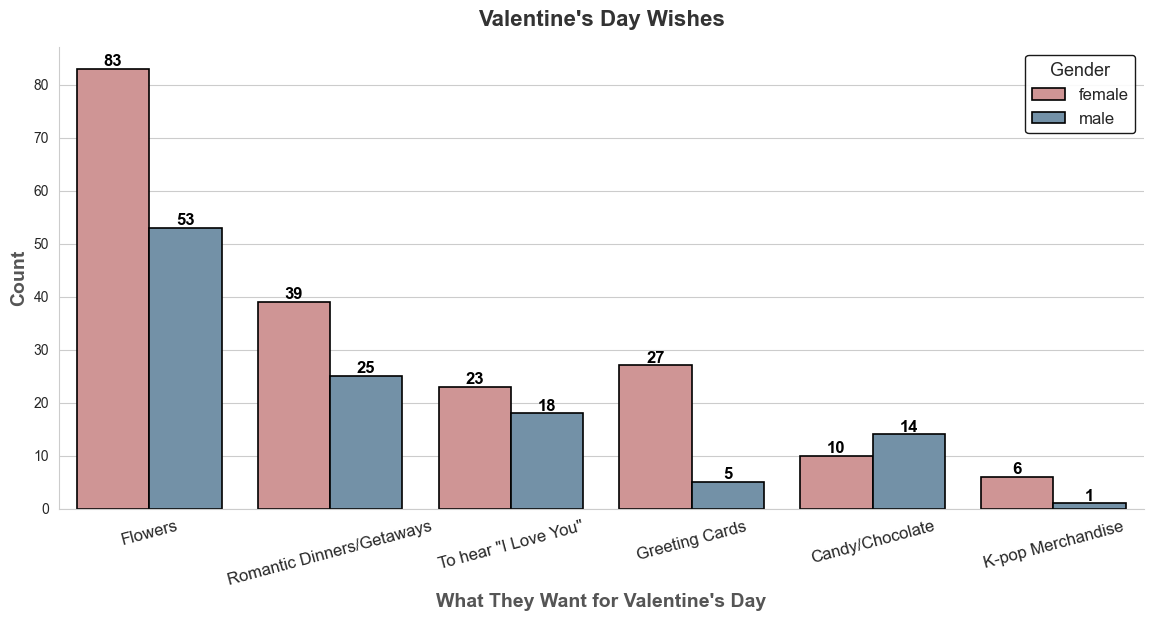

In [ ]:
# Standardizing "How_Rom_VDay" labels
my_love["Want_for_Vday"] = my_love["Want_for_Vday"].replace({
    "Romantic Dinners / Getaways": "Romantic Dinners/Getaways"
})
# Standardizing "Want_for_Vday" labels (if needed)
my_love["Want_for_Vday"] = my_love["Want_for_Vday"].str.strip()  # Remove extra spaces

# Count occurrences of each category
vday_counts = my_love["Want_for_Vday"].value_counts()

# Filter categories where count > 5
filtered_vday = vday_counts[vday_counts > 5].sort_values(ascending=False).index.tolist()

# Set figure size
my_pl.figure(figsize=(14, 6))

# Create a count plot for gender distribution, only showing filtered categories
ax = my_sb.countplot(data=my_love[my_love["Want_for_Vday"].isin(filtered_vday)], 
                      x="Want_for_Vday", order=filtered_vday, hue="Gender", 
                      palette=gender_colors, edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Valentine's Day Wishes", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("What They Want for Valentine's Day", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(fontsize=12, rotation=15)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


Flowers were the most commonly mentioned wish overall, with a slightly higher proportion of males mentioning them despite more females mentioning them in absolute terms. Similarly, romantic dinners/getaways and hearing "I Love You" were wishes where males proportionally showed slightly more interest. On the other hand, greeting cards and K-pop merchandise were almost exclusively mentioned by females, with a notable proportional preference among them.

---

 ### ___II.i.___ __How Romantic on Valentine's Day?__

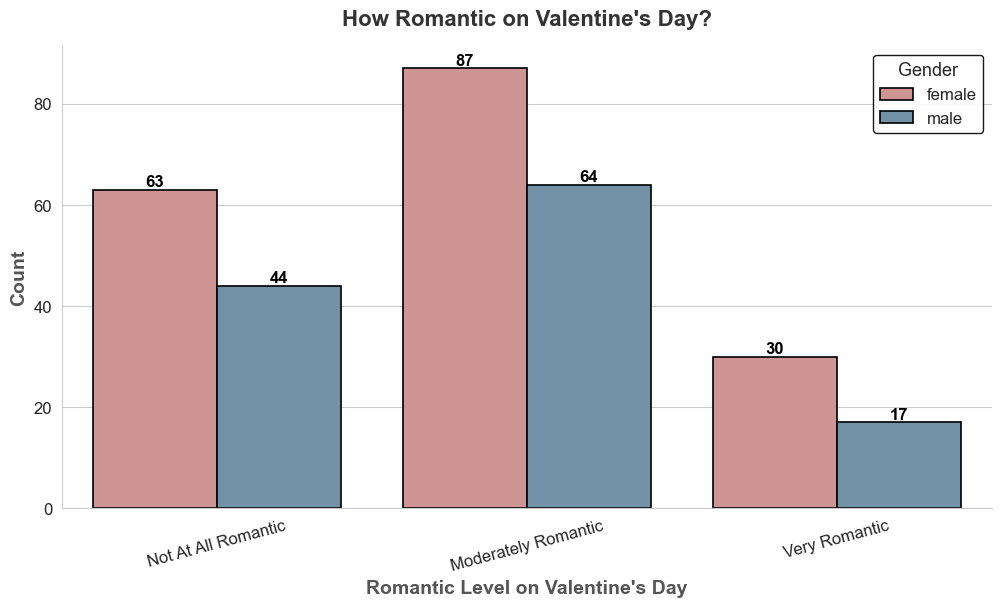

In [ ]:
# Standardizing "How_Rom_VDay" labels
my_love["How_Rom_VDay"] = my_love["How_Rom_VDay"].replace({
    "Not at all romantic": "Not At All Romantic",
    "Moderately romantic": "Moderately Romantic",
    "Very romantic": "Very Romantic"
}).str.strip()  # Remove extra spaces if present

# Define the correct order (Not at all → Moderately → Very)
romance_order = ["Not At All Romantic", "Moderately Romantic", "Very Romantic"]

# Set figure size
my_pl.figure(figsize=(12, 6))

# Create a count plot for gender distribution across Valentine's Day romance preferences
ax = my_sb.countplot(data=my_love, x="How_Rom_VDay", hue="Gender", 
                      order=romance_order, palette=gender_colors, edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("How Romantic on Valentine's Day?", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Romantic Level on Valentine's Day", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


- **Gender Comparison (Proportional View)**: Considering the larger number of female respondents in the sample (approx. 233 F vs 141 M), looking at proportions within each gender is key:
    - Not At All Romantic: A higher proportion of males (44/141 ≈ 31.2%) identified as "Not At All Romantic" compared to females (63/233 ≈ 27.0%).
    - Moderately Romantic: A notably higher proportion of males (64/141 ≈ 45.4%) identified as "Moderately Romantic" compared to females (87/233 ≈ 37.3%).
    - Very Romantic: The proportions identifying as "Very Romantic" were very similar between genders, with females slightly higher (Females: 30/233 ≈ 12.9%; Males: 17/141 ≈ 12.1%).

In the chart above, the most common opinion regarding Valentine's Day was "Moderately Romantic". Proportional analysis  revealed that male respondents were more likely than females to describe themselves as either "Not At All Romantic" or "Moderately Romantic". Roughly the same small percentage (around 12-13%) of both males and females identified as "Very Romantic".

---

 ### ___II.j.___ __Important Qualities in a Partner__

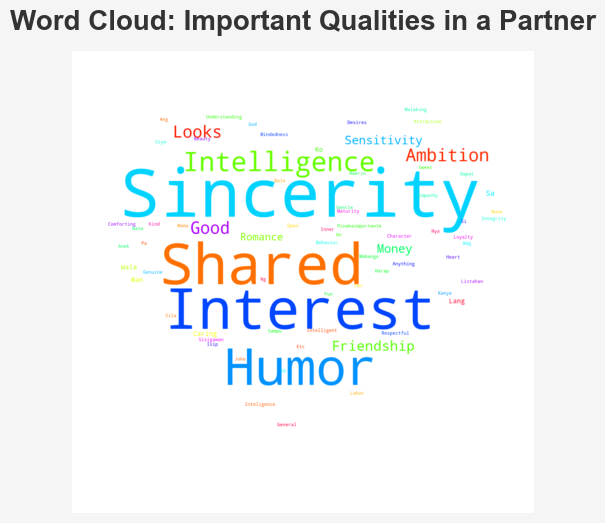

In [ ]:
# Combine all responses into a single string
text = " ".join(my_love["Imp_Quality"].dropna().str.title().replace(r"(^_+|_+$)", "", regex=True))

# Generate the word cloud with enhanced styling
wordcloud = WordCloud(width=800, height=600, background_color="white", mask=mask_image, collocations=False, prefer_horizontal=1,
                      colormap="hsv", min_font_size= 2, scale=3, margin=0,
                      max_words=400, font_path=None).generate(text)

# Create a larger figure with a custom background
fig, ax = my_pl.subplots(figsize=(13, 6))  # Light grayish background

# Display the word cloud
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_title("Word Cloud: Important Qualities in a Partner", fontsize=20, fontweight="bold", color="#333", pad=15)
ax.axis("off")  # Hide axes

# Add a subtle frame around the figure
fig.patch.set_facecolor("#f5f5f5")

# Show the plot
my_pl.show()

For these respondents, the most desired qualities in a partner revolve around sincerity, shared interests, humor, and intelligence. They value genuine connection, compatibility, fun, and intellect highly. Strong character attributes like kindness, respect, loyalty, and understanding are also important, alongside relational aspects like friendship and romance. While physical appearance (Looks) and financial aspects (Money) are acknowledged, they seem secondary to these fundamental personality and relational qualities within this group.

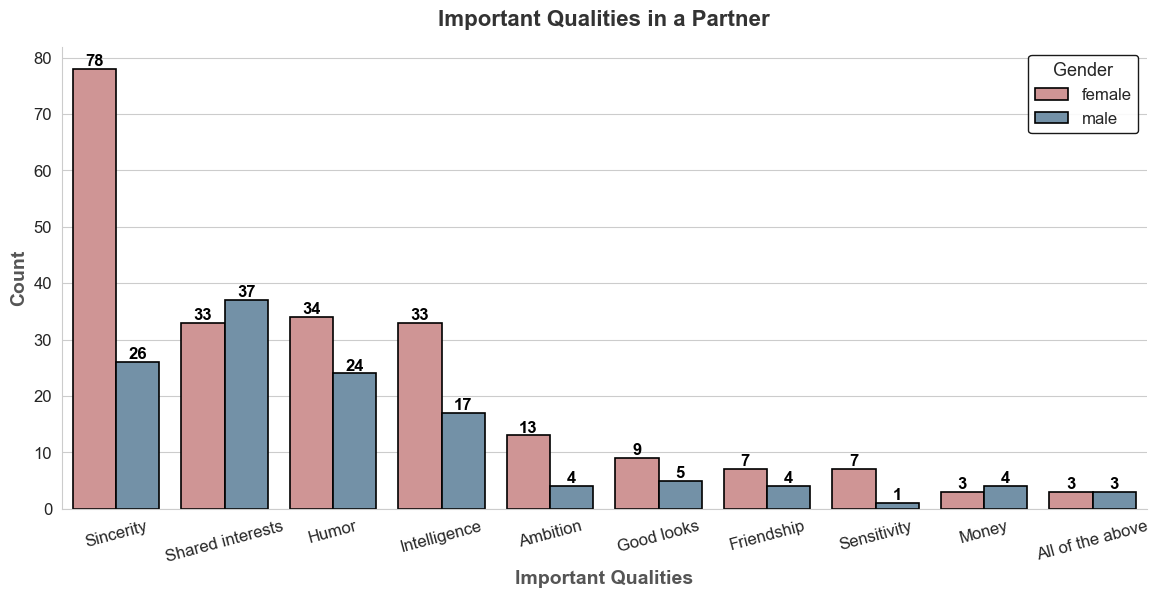

In [ ]:
# Standardizing "Imp_Quality" labels (if needed)
my_love["Imp_Quality"] = my_love["Imp_Quality"].str.strip()  # Remove extra spaces if present

# Rename specific labels for consistency
my_love["Imp_Quality"] = my_love["Imp_Quality"].replace({
    "Shared interest": "Shared interests",
    "Interests Shared" : "Shared interests",
    "Humor/Fun": "Humor"
})

# Count occurrences of each "Imp_Quality" by Gender
quality_counts = my_love.groupby("Imp_Quality")["Gender"].value_counts().unstack()

# Filter qualities where total responses exceed 5
filtered_qualities = quality_counts.sum(axis=1)[quality_counts.sum(axis=1) > 5].sort_values(ascending=False).index.tolist()

# Set figure size
my_pl.figure(figsize=(14, 6))  # Adjusted for better visibility

# Create a count plot with filtered qualities
ax = my_sb.countplot(data=my_love[my_love["Imp_Quality"].isin(filtered_qualities)], 
                      x="Imp_Quality", order= filtered_qualities, hue="Gender", 
                      palette=gender_colors, edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Important Qualities in a Partner", 
            fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Important Qualities", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


The chart above quantifies the preferences seen in the word cloud, revealing distinct gender differences in priorities for partner qualities among these student respondents:

- Females placed significantly higher value on Sincerity, Intelligence, Ambition, and Sensitivity.
- Males placed significantly higher value on Shared interests and slightly higher value on Humor and Money.
- Both genders ranked Good looks and Friendship relatively low in comparison to other traits.
- Sincerity stands out as the most valued trait overall, but especially so for female respondents.

These findings suggest that while both genders value core positive traits, female respondents emphasized intrinsic character and emotional/intellectual depth more, while males emphasized compatibility through shared activities and humor slightly more.

---

 ### ___II.k.___ __Should Men Confess / Women Answer their Suitor__

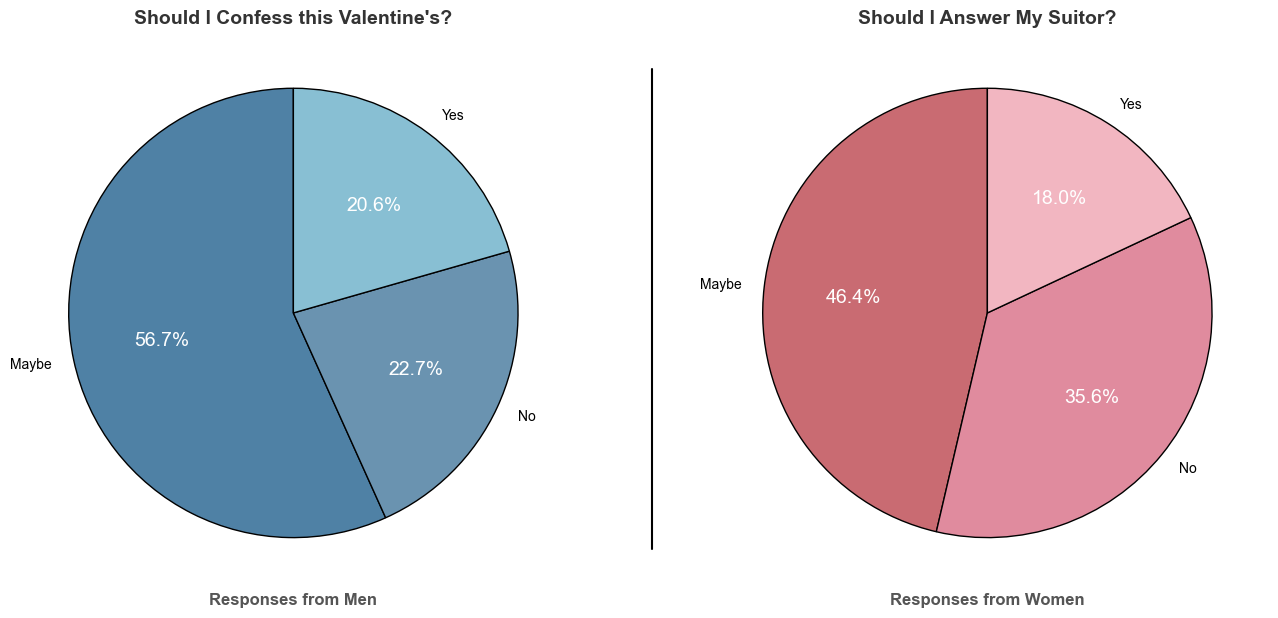

In [ ]:
# Prepare data
men_responses = my_love[my_love["Gender"] == "male"]["Men_confess_/_Women_answer "].value_counts()
women_responses = my_love[my_love["Gender"] == "female"]["Men_confess_/_Women_answer "].value_counts()

# Define slightly darker pastel colors
men_colors = ["#4F81A5", "#6A93B0", "#88BFD3"]
women_colors = ["#C96B72", "#E08B9E", "#F2B6C1"]

# Set figure size with two subplots
fig, axes = my_pl.subplots(1, 2, figsize=(14, 6))

# **Men's Responses (Should I Confess this Valentine's?)**
wedges, texts, autotexts = axes[0].pie(
    men_responses, labels=men_responses.index, autopct='%1.1f%%', 
    colors=men_colors, startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'color': 'white'}
)
for text in texts:  
    text.set_color("black")  # Keep labels black
for autotext in autotexts:  
    autotext.set_color("white")  # Make percentages white
    autotext.set_fontsize(14)  # **Increase font size for better readability**
axes[0].set_title("Should I Confess this Valentine's?", fontsize=14, fontweight="bold", color="#333")
axes[0].text(0, -1.3, "Responses from Men", ha='center', fontsize=12, fontweight='bold', color="#555")

# **Women's Responses (Should I Answer My Suitor?)**
wedges, texts, autotexts = axes[1].pie(
    women_responses, labels=women_responses.index, autopct='%1.1f%%', 
    colors=women_colors, startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'color': 'white'}
)
for text in texts:  
    text.set_color("black")  # Keep labels black
for autotext in autotexts:  
    autotext.set_color("white")  # Make percentages white
    autotext.set_fontsize(14)  # **Increase font size for better readability**
axes[1].set_title("Should I Answer My Suitor?", fontsize=14, fontweight="bold", color="#333")
axes[1].text(0, -1.3, "Responses from Women", ha='center', fontsize=12, fontweight='bold', color="#555")

# **Draw a vertical line between the two subplots**
fig.subplots_adjust(wspace=0.5)  # Adjust space between subplots
line_x = (axes[0].get_position().x1 + axes[1].get_position().x0) / 2
fig.patches.append(my_pl.Line2D([line_x, line_x], [0.1, 0.9], transform=fig.transFigure, color="black", linewidth=1.5))

# Display the plots
my_pl.tight_layout()
my_pl.show()


- Based on the visualizations presented above, both male and female respondents exhibited high levels of uncertainty ('Maybe') regarding these significant romantic steps on Valentine's Day. 

- When the males decided, there were an almost an even split on confessing (slightly leans on 'No'). Females, on the other hand, were more likely to lean towards "No" than "Yes" when answering a suitor during Valentine's Day. 

---
---

## <center>------___IV.___ __Conclusions__------

The Valentine's survey of students CSPC reveals a glimpse of young adults navigating romance with a blend of traditional expectations and modern realities. Based on the analyses of the data, they value deep character traits like sincerity, compatibility through shared interests, humor, and intelligence in partners. Their Valentine's wishes encompass material gifts, quality time, emotional connection, and practicality. However, despite clear ideas about relationships, there's a noticeable sense of hesitation and uncertainty when it comes to initiating or formalizing romantic connections, particularly around the heightened expectations of Valentine's Day. The data reflects a group balancing personal desires with potential cultural nuances and the inherent complexities of young love.